# Exercise 3 - Linear regression optimisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a) Read the data in separate variables for the training and test sets.

In [2]:
dataset_train = pd.read_csv('overfitting_train.csv')
dataset_test = pd.read_csv('overfitting_test.csv')

In [3]:
dataset_train.head()

,x,y
0,-1.000000,-1.859783
1,0.333333,2.768337
2,1.666667,3.246021
3,3.000000,1.784168
4,4.333333,2.175140


In [4]:
X_train = dataset_train['x'].values
y_train = dataset_train['y'].values
X_test = dataset_test['x'].values
y_test = dataset_test['y'].values

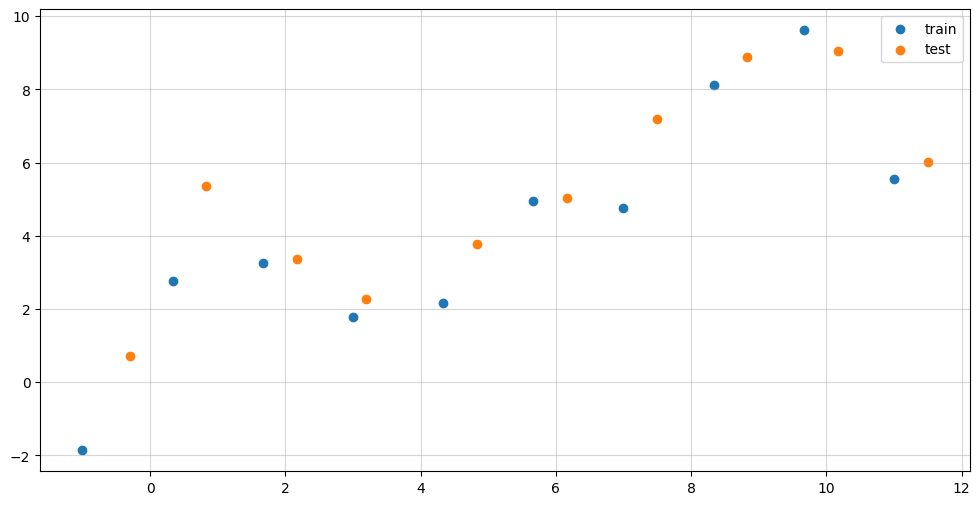

In [5]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['train', 'test']);

b) Define a cost function
$J(θ)$
that will allow you to compute the cost on the training and
cross-validation sets.


$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

where $h_{\theta}(\mathbf{x}_{n})$ is your prediction.

In [6]:
def compute_cost(y_pred, y_true):
    N = y_pred.shape[0]
    return (1.0 / (2.0 * N)) * np.sum((y_pred - y_true)**2)

c) Perform the training for increasing orders $O= 1 ,..., 10$.

You can use any training method developed in the previous practical work. Using the [normal equation](http://mlwiki.org/index.php/Normal_Equation) is probably the easiest choice.

In [9]:
# TODO: implement the training method. The pseudo-code here is mostly for the normal equation. Adapt to your needs.

def fit(X_train: np.array, y_train: np.array, order: float) -> np.array:
    """
    This function should return the optimal thetas for the given order using the normal equation for linear regression.

    :param X_train: the training data
    :param y_train: the training labels
    :param order: the order of the polynomial to fit
    :return: the optimal thetas
    """
    X_design = np.ones((X_train.shape[0], order + 1))
    for i in range(1, order + 1):
        X_design[:, i] = X_train ** i
    thetas = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y_train
    
    return thetas

def predict(thetas: np.array, X: np.array) -> np.array:
    """
    This function should return the predictions for the given data X.

    :param thetas: the optimal thetas
    :param X: the data to predict
    :return: the predictions
    """
    order = thetas.shape[0] - 1
    X_design = np.ones((X.shape[0], order + 1))
    for i in range(1, order + 1):
        X_design[:, i] = X ** i
    y_pred = X_design @ thetas
    
    return y_pred

Order=0; cost on train set: 4.84; cost on test set: 3.90
Order=1; cost on train set: 1.41; cost on test set: 1.68
Order=2; cost on train set: 1.35; cost on test set: 1.61
Order=3; cost on train set: 1.31; cost on test set: 1.54
Order=4; cost on train set: 0.20; cost on test set: 1.03
Order=5; cost on train set: 0.20; cost on test set: 0.98
Order=6; cost on train set: 0.14; cost on test set: 2.19
Order=7; cost on train set: 0.11; cost on test set: 4.39
Order=8; cost on train set: 0.05; cost on test set: 1.52
Order=9; cost on train set: 0.00; cost on test set: 137.78


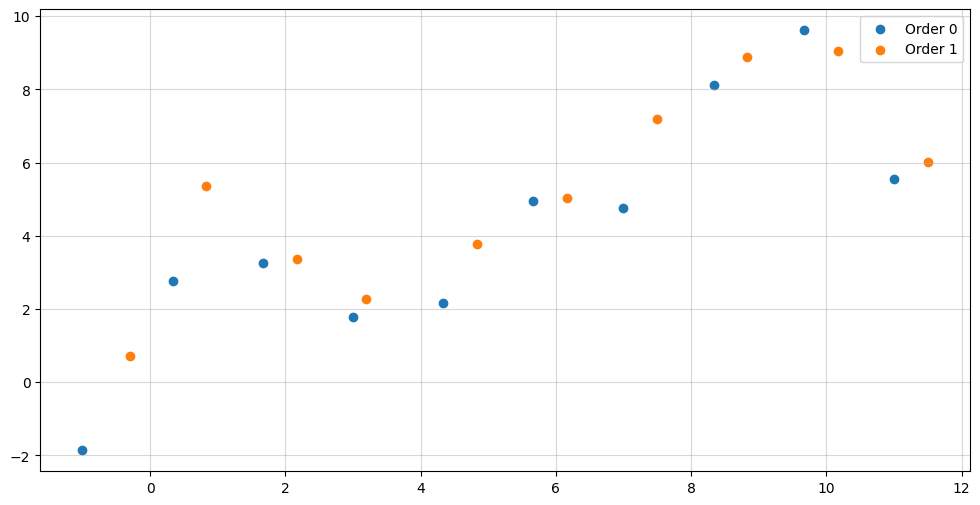

In [11]:

plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

train_cost_curve = []
test_cost_curve = []
for order in range(10):
    thetas = fit(X_train, y_train, order)
    y_pred_train = predict(thetas, X_train)
    y_pred_test = predict(thetas, X_test)
    cost_train = compute_cost(y_pred_train, y_train)
    cost_test = compute_cost(y_pred_test, y_test)
    train_cost_curve.append(cost_train)
    test_cost_curve.append(cost_test)

    print(f"Order={order}; cost on train set: {cost_train:.2f}; cost on test set: {cost_test:.2f}")


plt.legend([f"Order {i}" for i in range(10)]);

e) Plot the evolution of the costs
$J_{train}(θ)$ and $J_{cv}(θ)$
as a function of the order O.

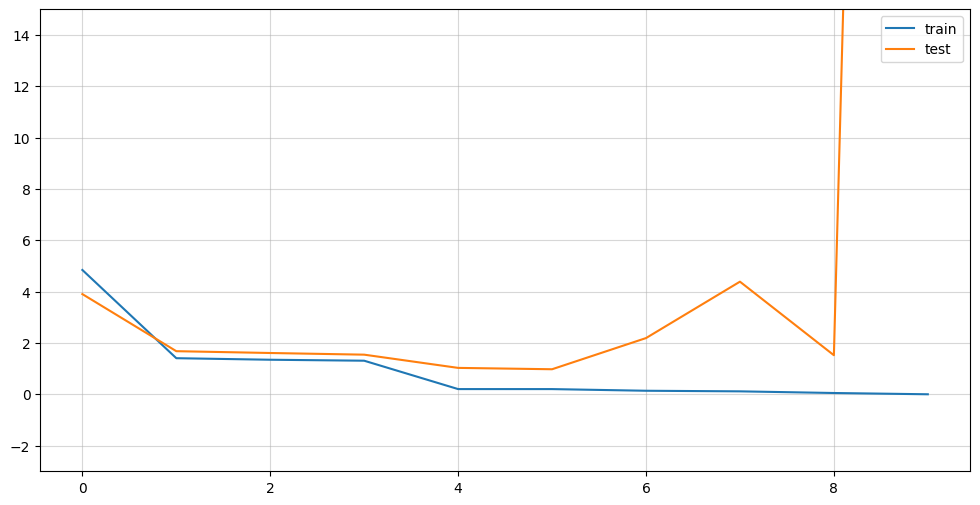

In [12]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.plot(train_cost_curve)
plt.plot(test_cost_curve)
plt.ylim(-3, 15)
plt.legend(['train', 'test']);

**f) What is your best model according to these costs ? Comment your answer.**

The best model is the model with the lowest cost, in this case it is the model with the order 5. 

**g) Would you still choose the model with the lowest cost for production?**

No not necessarily, because the model with the lowest cost is the model that fits the best the training data. But it is not necessarily the model that fits the best the test data. So we should choose explore different solutions.

**h) Explain how under/over-fitting is involved here.**

We can see on the graph that the model with the order 10 is overfitting the data. Indeed, the cost on the training data is very low but the cost on the test data is very high. On the other hand, the model with the order 1 is underfitting the data. Indeed, the cost on the training data is high and the cost on the test data is also high.